In [6]:
from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
users = [{"id":0,"name":'Hero'},
        {"id":1,"name":'Dunn'},
        {"id":2,"name":'Sue'},
        {"id":3,"name":'Chi'},
        {"id":4,"name":'Thor'},
        {"id":5,"name":'Clive'},
        {"id":6,"name":'Hicks'},
        {"id":7,"name":'Devin'},
        {"id":8,"name":'Kate'},
        {"id":9,"name":'Klien'}]


In [4]:
friendship_list=[(0,1),(1,2),(0,2),(1,3),(2,3),(3,4),(4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]

In [7]:
friendships = {user["id"]:[] for user in users}

In [8]:
for i,j in friendship_list:
    friendships[i].append(j)
    friendships[j].append(i)

In [28]:
print(friendships)
for user in users:
    print(user)

{0: [1, 2], 1: [0, 2, 3], 2: [1, 0, 3], 3: [1, 2, 4], 4: [3, 5], 5: [4, 6, 7], 6: [5, 8], 7: [5, 8], 8: [6, 7, 9], 9: [8]}
{'id': 0, 'name': 'Hero'}
{'id': 1, 'name': 'Dunn'}
{'id': 2, 'name': 'Sue'}
{'id': 3, 'name': 'Chi'}
{'id': 4, 'name': 'Thor'}
{'id': 5, 'name': 'Clive'}
{'id': 6, 'name': 'Hicks'}
{'id': 7, 'name': 'Devin'}
{'id': 8, 'name': 'Kate'}
{'id': 9, 'name': 'Klien'}


Getting most connected friends

In [34]:
def num_of_friends(user):
    usr = user["id"]
    frnds = friendships[usr]
    return len(frnds)


In [36]:
total_connections=0
for user in users:
    total_connections+=(num_of_friends(user))
#total_connections = sum(num_of_friends(user) for user in users)

print(total_connections)


24


In [38]:
avg = total_connections/len(users)
print(avg)

2.4


In [40]:
num_frnds_id = [(user["id"],num_of_friends(user)) for user in users]
print(num_frnds_id)

[(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]


In [43]:
num_frnds_id.sort(key = lambda id_and_friends:id_and_friends[1],reverse=True)

print(num_frnds_id)

[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


#getting friend of friend list

In [46]:
def fof_id(user):
    return [fof_id
            for friend in friendships[user["id"]] 
            for fof_id in friendships[friend]]

In [48]:
print(fof_id(users[0]))

[0, 2, 3, 1, 0, 3]


Getting mutual friends

In [54]:


def mutual_friends(user):
    user_id = user["id"]
    return Counter(fof_id
                  for friends in friendships[user_id] #for all my friends
                  for fof_id in friendships[friends] # all of friends friend
                  if fof_id != user_id #exclude the user
                  and fof_id not in friendships[user_id])

    

In [55]:
print(mutual_friends(users[3]))


Counter({0: 2, 5: 1})


In [56]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

Finding potiential friends with similar interest

In [59]:

interest_dict=defaultdict(list)
for id,interest in interests:
        interest_dict[interest].append(id)

print(interest_dict)    


defaultdict(<class 'list'>, {'Hadoop': [0, 9], 'Big Data': [0, 8, 9], 'HBase': [0, 1], 'Java': [0, 5, 9], 'Spark': [0], 'Storm': [0], 'Cassandra': [0, 1], 'NoSQL': [1], 'MongoDB': [1], 'Postgres': [1], 'Python': [2, 3, 5], 'scikit-learn': [2, 7], 'scipy': [2], 'numpy': [2], 'statsmodels': [2], 'pandas': [2], 'R': [3, 5], 'statistics': [3, 6], 'regression': [3, 4], 'probability': [3, 6], 'machine learning': [4, 7], 'decision trees': [4], 'libsvm': [4], 'C++': [5], 'Haskell': [5], 'programming languages': [5], 'mathematics': [6], 'theory': [6], 'Mahout': [7], 'neural networks': [7, 8], 'deep learning': [8], 'artificial intelligence': [8], 'MapReduce': [9]})


user_id to list of interests

In [61]:
usr_interest_dict=defaultdict(list)
for id,interest in interests:
        usr_interest_dict[id].append(interest)

print(usr_interest_dict) 

defaultdict(<class 'list'>, {0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'], 1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'], 2: ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'], 3: ['R', 'Python', 'statistics', 'regression', 'probability'], 4: ['machine learning', 'regression', 'decision trees', 'libsvm'], 5: ['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages'], 6: ['statistics', 'probability', 'mathematics', 'theory'], 7: ['machine learning', 'scikit-learn', 'Mahout', 'neural networks'], 8: ['neural networks', 'deep learning', 'Big Data', 'artificial intelligence'], 9: ['Hadoop', 'Java', 'MapReduce', 'Big Data']})


FIND USERS with max common interests

In [64]:
def most_commom_interest(user):
    user_id = user["id"]
    return Counter( common_ids
                    for interest in usr_interest_dict[user_id]
                    for common_ids in interest_dict[interest]
                    if user_id != common_ids )


most_commom_interest(users[0])

Counter({9: 3, 8: 1, 1: 2, 5: 1})

Data Scientist Salary and tenure

In [65]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [66]:
salary_by_tenure = defaultdict(list)
for salary,tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
print(salary_by_tenure)

defaultdict(<class 'list'>, {8.7: [83000], 8.1: [88000], 0.7: [48000], 6: [76000], 6.5: [69000], 7.5: [76000], 2.5: [60000], 10: [83000], 1.9: [48000], 4.2: [63000]})


Create buckets

In [67]:
def salary_buckets(tenure):
    if tenure < 2:
        return "less than 2"
    elif tenure < 5:
        return "less than 5"
    else:
        return "more than 5"

In [73]:
salary_by_tenure_bucket = defaultdict(list)

for salary,tenure in salaries_and_tenures:
    bucket = salary_buckets(tenure)
    salary_by_tenure_bucket[bucket].append(salary)
print(salary_by_tenure_bucket)

defaultdict(<class 'list'>, {'more than 5': [83000, 88000, 76000, 69000, 76000, 83000], 'less than 2': [48000, 48000], 'less than 5': [60000, 63000]})


Calculating avg for tenure

In [89]:
average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket,salaries in salary_by_tenure_bucket.items()
}
print(average_salary_by_bucket)

TypeError: 'int' object is not callable

In [95]:
average_salary_by_bucket = defaultdict(list)
for a,b in salary_by_tenure_bucket.items():
    for value in b:
        sum = sum + value
    average_salary_by_bucket[a].append(sum/len(b))

print(average_salary_by_bucket)


defaultdict(<class 'list'>, {'more than 5': [79166.66666666667], 'less than 2': [285500.0], 'less than 5': [347000.0]})


get most interest subjects

In [97]:
words_and_counts = Counter(
                    word
                    for user,interest in interests
                    for word in interest.lower().split())
print(words_and_counts)

for word,count in words_and_counts.most_common():
    if count >1:
        print(word,count)

Counter({'big': 3, 'data': 3, 'java': 3, 'python': 3, 'learning': 3, 'hadoop': 2, 'hbase': 2, 'cassandra': 2, 'scikit-learn': 2, 'r': 2, 'statistics': 2, 'regression': 2, 'probability': 2, 'machine': 2, 'neural': 2, 'networks': 2, 'spark': 1, 'storm': 1, 'nosql': 1, 'mongodb': 1, 'postgres': 1, 'scipy': 1, 'numpy': 1, 'statsmodels': 1, 'pandas': 1, 'decision': 1, 'trees': 1, 'libsvm': 1, 'c++': 1, 'haskell': 1, 'programming': 1, 'languages': 1, 'mathematics': 1, 'theory': 1, 'mahout': 1, 'deep': 1, 'artificial': 1, 'intelligence': 1, 'mapreduce': 1})
big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


In [99]:
x=[4,1,2,3]
y=sorted(x)
print(y)
sorted(x,reverse=True)

[1, 2, 3, 4]


[4, 3, 2, 1]

In [101]:
import matplotlib.pyplot as plt

In [102]:
years = [1950,1960,1970,1980,1990,2000,2010]
gdp = [300.2,543.2,1075.9,2862.5,5979.6,10289.7,14958.4]

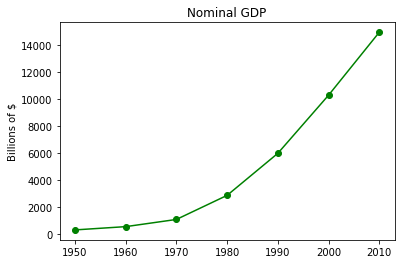

In [105]:
plt.plot(years,gdp,color='green',marker='o',linestyle='solid')
plt.title('Nominal GDP')
plt.ylabel('Billions of $')
plt.show()

In [106]:
movies = ['Annie Hall','Ben-Hur','Casablanca','Gandhi','West Side Story']
num_oscars=[5,11,3,8,10]

Text(0, 0.5, '# of Academy Awards')

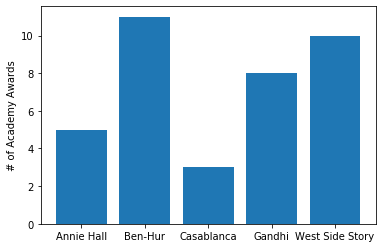

In [110]:
plt.bar(range(len(movies)),num_oscars)
plt.xticks(range(len(movies)),movies)
plt.ylabel('# of Academy Awards')

Counter({80: 4, 90: 3, 70: 3, 0: 2, 60: 1})


<BarContainer object of 5 artists>

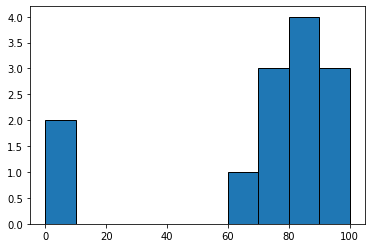

In [7]:
from collections import Counter


grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]

histogram = Counter(min(grade//10 * 10,90) for grade in grades)
print(histogram)



<BarContainer object of 2 artists>

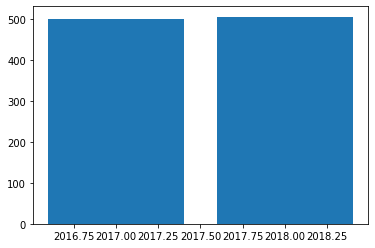

In [12]:
mentions = [500,505]
years = [2017,2018]

plt.bar(years,mentions,0.8)

In [17]:
def find_median(x):
    sorted(x)
    if len(x)%2 ==0:
        mid = len(x)//2
        return (x[mid-1]+x[mid])//2
    else:
        return x[len(x)//2]

x =[2,3,4,5]
x1=[2,3,4,5,6]
find_median(x1)
    

4